In [2]:
import datetime

In [3]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to change the path if needed.)
crypto_data_to_load = "archive/btcusd.csv"

# Read the School Data and Student Data and store into a Pandas DataFrame
crypto_df = pd.read_csv(crypto_data_to_load)

crypto_df.head()


,time,open,close,high,low,volume
0,1364774820000,93.25,93.30,93.30,93.25,93.300000
1,1364774880000,100.00,100.00,100.00,100.00,93.300000
2,1364774940000,93.30,93.30,93.30,93.30,33.676862
3,1364775060000,93.35,93.47,93.47,93.35,20.000000
4,1364775120000,93.47,93.47,93.47,93.47,2.021627


In [4]:
# Convert time format
crypto_df['time']=(pd.to_datetime(crypto_df['time'],unit='ms')) 

In [5]:
import matplotlib.pyplot as plt

In [6]:
day_df = crypto_df.groupby(pd.Grouper(key='time', axis=0, freq='D')).mean()

In [7]:
crypto_df.head()

,time,open,close,high,low,volume
0,2013-04-01 00:07:00,93.25,93.30,93.30,93.25,93.300000
1,2013-04-01 00:08:00,100.00,100.00,100.00,100.00,93.300000
2,2013-04-01 00:09:00,93.30,93.30,93.30,93.30,33.676862
3,2013-04-01 00:11:00,93.35,93.47,93.47,93.35,20.000000
4,2013-04-01 00:12:00,93.47,93.47,93.47,93.47,2.021627


In [8]:
day_df.head()

,open,close,high,low,volume
time,,,,,
2013-04-01,99.280477,99.273803,99.353525,99.190807,22.326501
2013-04-02,108.770888,108.775284,108.846562,108.687410,25.079424
2013-04-03,128.621537,128.670438,128.999930,128.317583,23.124991
2013-04-04,131.898023,131.878847,132.046600,131.749771,14.306697
2013-04-05,138.030930,138.069119,138.146174,137.964582,15.129717


In [9]:
day_df = day_df.drop(['open','high','low','volume'],axis=1)

In [10]:
hour_df = crypto_df.groupby(pd.Grouper(key='time', axis=1, freq='H')).mean()

,open,close,high,low,volume
time,,,,,
2013-04-01 00:00:00,93.849453,93.883090,93.883091,93.849452,31.416717
2013-04-01 01:00:00,93.396967,93.386734,93.397851,93.354738,5.027037
2013-04-01 02:00:00,93.407799,93.432999,93.468999,93.407799,46.631142
2013-04-01 03:00:00,92.875002,92.875005,92.875005,92.875002,24.079045
2013-04-01 04:00:00,93.155010,93.155030,93.155030,93.155010,5.000000
...,...,...,...,...,...
2021-10-05 06:00:00,49409.587871,49408.584394,49418.991361,49398.846702,1.856185
2021-10-05 07:00:00,49504.835853,49507.897551,49519.565073,49495.331299,3.341434
2021-10-05 08:00:00,49640.312057,49646.456479,49659.443112,49628.137986,9.656066


In [11]:
#add SMA 10
day_df['SMA_10'] = day_df.close.rolling(10, min_periods=1).mean()


In [12]:
day_df.head()

,close,SMA_10
time,,
2013-04-01,99.273803,99.273803
2013-04-02,108.775284,104.024543
2013-04-03,128.670438,112.239842
2013-04-04,131.878847,117.149593
2013-04-05,138.069119,121.333498


In [13]:
plt.style.use('seaborn')
colors = ['green','red']

<AxesSubplot:xlabel='time'>

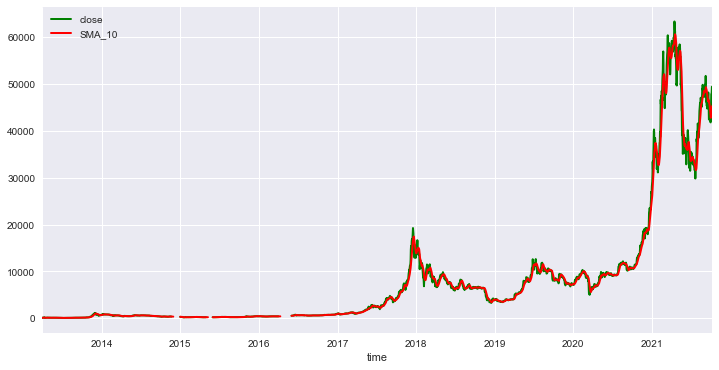

In [14]:
day_df.plot(color=colors, linewidth=2, figsize=(12,6))

In [15]:
day_df['std'] = day_df.close.rolling(20, min_periods=1).std()

In [16]:
day_df['upper'] = day_df.SMA_10 + (2 * day_df['std'])

In [17]:
day_df['lower'] = day_df.SMA_10 - (2 * day_df['std'])

In [30]:
# add larger set of b bands and 100 ma
day_df['SMA_100'] = day_df.close.rolling(100, min_periods=1).mean()
day_df['stdlong'] = day_df.close.rolling(100, min_periods=1).std()
day_df['upperlong'] = day_df.SMA_100 + (3 * day_df['stdlong'])
day_df['lowerlong'] = day_df.SMA_100 - (3 * day_df['stdlong'])

In [31]:
day_df.head()

,close,SMA_10,std,upper,lower,SMA_100,upperlong,lowerlong,stdlong
time,,,,,,,,,
2013-04-01,99.273803,99.273803,NaN,NaN,NaN,99.273803,NaN,NaN,NaN
2013-04-02,108.775284,104.024543,6.718562,117.461667,90.587420,104.024543,124.180229,83.868858,6.718562
2013-04-03,128.670438,112.239842,15.001430,142.242702,82.236981,112.239842,157.244133,67.235550,15.001430
2013-04-04,131.878847,117.149593,15.698765,148.547124,85.752062,117.149593,164.245889,70.053296,15.698765
2013-04-05,138.069119,121.333498,16.503447,154.340391,88.326605,121.333498,170.843838,71.823159,16.503447


In [32]:
new_df = day_df[['close','SMA_10','upper','lower','SMA_100','upperlong','lowerlong']].copy()

<AxesSubplot:xlabel='time'>

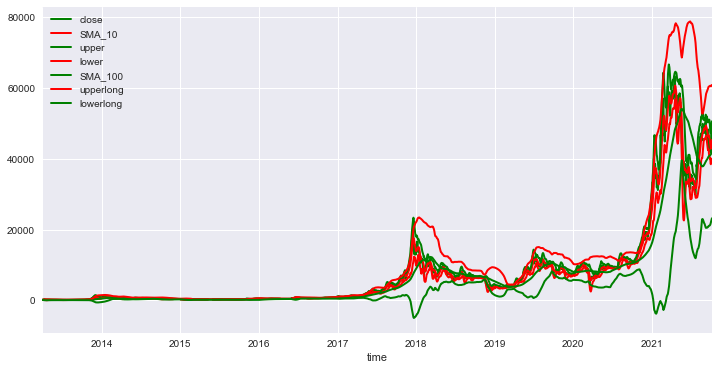

In [33]:
new_df.plot(color=colors, linewidth=2, figsize=(12,6))